#Analisis de datos del titanic

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("Titanic-Dataset.csv")

In [8]:
#mostrar dimensiones del dataframe
titanic.shape

(891, 12)

In [10]:
#Imprimir primeras 5 filas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

#Tratamiento datos nulos
# suma de datos nulos por columna 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Rellenar los valores de la edad conla media
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

titanic.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13156\2376822618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#
if 'Cabin'in titanic.columns and titanic['Cabin'].isnull().sum()/len(titanic)>0.5:
    titanic.drop('Cabin',axis=1,inplace=True)

print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [15]:
#rellenar los nulos de puerto de embarked con la moda

if 'Embarked' in titanic.columns:
    titanic['Embarked'].fillna(titanic['Embarked'].mode()[0] 
                               , inplace=True)
titanic.isnull().sum()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13156\3147218959.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0]


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

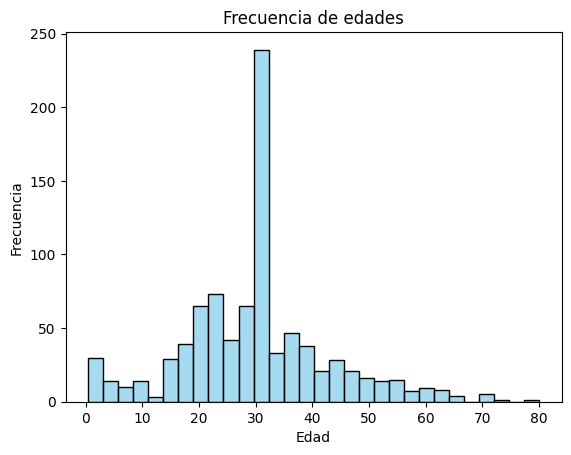

In [16]:
#Histograma de las edades
plt.Figure(figsize=(8,5))
sns.histplot(titanic['Age'],bins=30,color='skyblue')
plt.title("Frecuencia de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13156\1856363051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic ,palette='viridis')


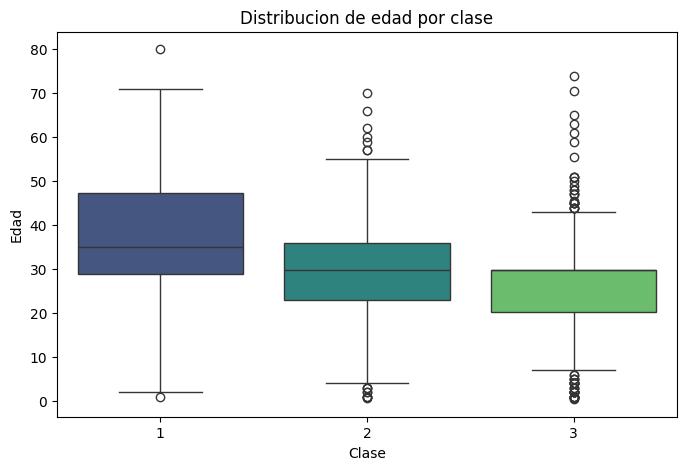

In [22]:
#diagrama de cajas
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', data=titanic ,palette='viridis')
plt.title("Distribucion de edad por clase")
plt.xlabel("Clase")
plt.ylabel("Edad")
plt.show()


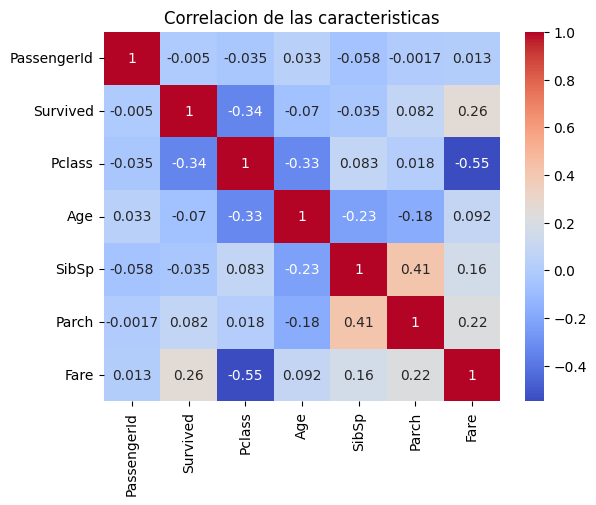

In [24]:
#diagrama de correlacion seleccionando solo las columnas
df_numerico=titanic.select_dtypes(include='number')
correlacion_matriz=df_numerico.corr()
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title("Correlacion de las caracteristicas")
plt.show()

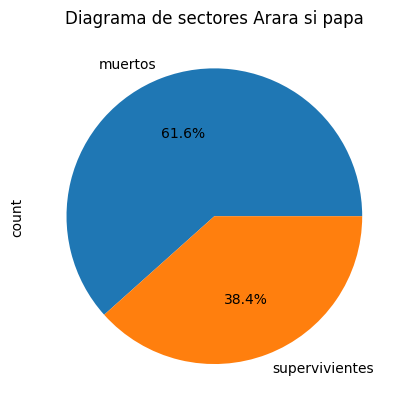

In [35]:
#diagrama de sectores de fallecidos y supervivientes
plt.figure()
titanic.Survived.value_counts().plot(kind="pie", labels=["muertos","supervivientes"], title="Diagrama de sectores Arara si papa", autopct='%1.1f%%' )
plt.show()

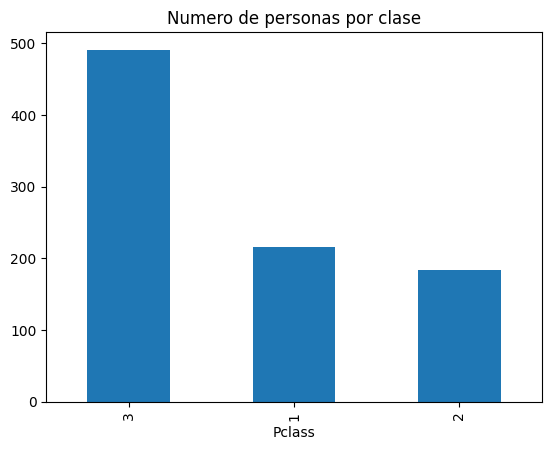

In [38]:
#diagrama de barras con nnumero de personas de cada clase
titanic.Pclass.value_counts().plot(kind="bar",title="Numero de personas por clase")
plt.show()


In [48]:
#datos generales
print("Dimensiones:", titanic.shape)
print("numero de elementos:", titanic.size)
print("Nombres de filas :", titanic.index)
print("tipos de datos  :", titanic.dtypes)
print("primeras diez filas  :", titanic.head(10))
print("ultimas diez filas  :", titanic.tail(10))

#pasajeros 148
print(f"el pasajero 148 es {titanic.loc[titanic['PassengerId']==148]}")

Dimensiones: (891, 11)
numero de elementos: 9801
Nombres de filas : RangeIndex(start=0, stop=891, step=1)
tipos de datos  : PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
primeras diez filas  :    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex        Age  \
0                            Braund, Mr. Owen Harris    male  22.000000   
1  Cumings, Mrs. John Bradley (Florence

In [50]:
#mostrar por pantalla las filas pares del dataframe
print(titanic.iloc[range(0,titanic.shape[0],2)])

#mostrar nombres de personas que iban en primera clase ordenadas alfabeticamente 
print(titanic.loc[titanic['Pclass']==1]['Name'].sort_values)

#mostrar el % de personas que sobrevivieron y murieron
print(titanic['Survived'].value_counts()/ titanic['Survived'].count()*100)

#mostrar el % de personas que sobrevivieron y murieron
titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)

     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
4              5         0       3   
6              7         0       1   
8              9         1       3   
..           ...       ...     ...   
882          883         0       3   
884          885         0       3   
886          887         0       2   
888          889         0       3   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
4                             Allen, Mr. William Henry    male  35.000000   
6                              McCarthy, Mr. Timothy J    male  54.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
..                                                 ...     ...        ...   
882 

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

In [53]:
#mostrar la edad media de las mujeres que viajaban en cada clase

titanic.groupby(['Pclass','Sex'])['Age'].mean().unstack()['female']

Pclass
1    34.141405
2    28.748661
3    24.068493
Name: female, dtype: float64

In [71]:
#Añadir columna booleana para saber si el pasajero era menor de edad
titanic['es_menor']=titanic['Age']<18
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,es_menor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,False


In [73]:
#mostrar el porcentaje de menores y mayores de edad que sobrevivieron en cada clase
titanic.groupby(['Pclass', 'es_menor'])['Survived'].value_counts(normalize=True)*100

Pclass  es_menor  Survived
1       False     1           61.274510
                  0           38.725490
        True      1           91.666667
                  0            8.333333
2       False     0           59.006211
                  1           40.993789
        True      1           91.304348
                  0            8.695652
3       False     0           78.208232
                  1           21.791768
        True      0           62.820513
                  1           37.179487
Name: proportion, dtype: float64